[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

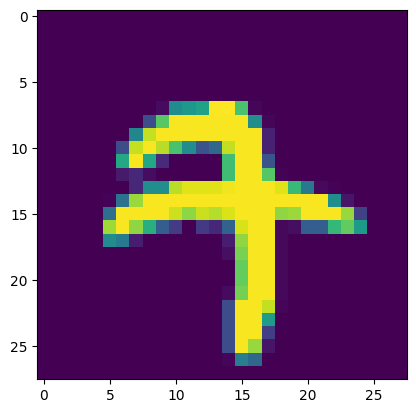

tensor(7)


In [13]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt 

train= datasets.MNIST("", download=True, train= True, transform=transforms.Compose([transforms.ToTensor()]))
test= datasets.MNIST("", train= False, download= True, transform=transforms.Compose([transforms.ToTensor()]))

trainset= torch.utils.data.DataLoader(train, batch_size=10, shuffle= True)
testset= torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

#printing 1st batch of trainset
for data in trainset:
    print(data)
    break

#Cross-checking say 4th image of the 1st batch with its output
a,b= data[0][4], data[1][4]

plt.imshow(a.view(28,28))
plt.show()
print(b)

In [14]:
import torch.nn as nn 
import torch.nn.functional as F
#training the model using linear NN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)
        
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return F.log_softmax(x,dim=1)
    
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
import torch.optim as optim 
optimizer= optim.Adam(net.parameters(), lr=0.001)

EPOCHS=3

for epoch in range(EPOCHS):
    for data in trainset:
        X,y= data
        net.zero_grad()
        output= net(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        loss.backward()
        optimizer.step()

correct=0
total=0

with torch.no_grad():
    for data in testset:
        X, y= data
        output= net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1

print("Accuracy for Simple NN:", round(correct/total,3))



Accuracy for Simple NN: 0.967


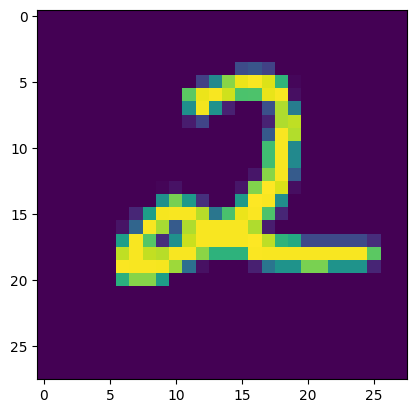

tensor(2)


In [16]:
import matplotlib.pyplot as plt 
plt.imshow(X[3].view(28,28))
plt.show()
print(torch.argmax(net(X[3].view(-1,28*28))))
